# Python-MLearning: Digits Recognition using Logistic Regression (LR), Optimal Number of Variales, and Sklearn Library

By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; July 25, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>

# I GENERALITIES

This paper deals with an application of the Logistic Regression (LR) algorithm to the MNIST database, in order to obtain a model that allows to recognize handwritten digits and classify them in an appropriate way.

RandomizedSearchCV search is used to access suitable hyperparameters within a proposed range.

The MNIST database is available at http://yann.lecun.com/exdb/mnist/. The present project initially considers a complete version of MINIST called "mnist_My.csv" which includes the 70 thousand original images. This is achieved by joining the training (60,000 images) and testing (10,000) files that are usually delivered separately.

This project considers an optimal number of variables to be used as predictors in the logistic regression model used. This reduces the number of variables from 784 to 253. However, RandomizedSearchCV takes a non-depressible time to access the results. For this reason, I consider only a small sample to perform the search (the same <u>train</u> dataset instead the <u>full</u> dataset), and then I project the results to the remaining base. Of course, all this is done with the ultimate goal of reducing processing times, nothing more.

Finally, a way to explore the MNIST database can be found [here](http://www.arqmain.net/Researches/Researchs/Digit_Recognition/Exploratory_DAnalysis/Exploratory_DAnalysis_MNIST_RProject.html).

# II IMPORT REQUIRED PACKAGES

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as pl
%matplotlib inline
from datetime import datetime
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve 

#sklearn.linear_model.LogisticRegression
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# III LOADING DATA

In [3]:
#Checking working directory
# import os
os.getcwd()

'C:\\Users\\Alvaro\\Documents\\R-Python-Projects_April042018\\Python_Projects\\Machine-Learning\\Logistic Regression\\Logistic2'

In [4]:
#List files in a directory
os.listdir()

['.ipynb_checkpoints',
 'Backup',
 'Logistic Classification on Digit numbers.txt',
 'Material Support',
 'python - Scikit-learn - feature reduction using RFECV and GridSearch.pdf',
 'PYTHON-MLearning_LR2_Final.ipynb']

# IV MODELING

## Loading Full Data Set

In [5]:
# read csv (comma separated value) into data
data=pd.read_csv('..\..\RandomForest\RandomForest2\mnist_My.csv')
data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [6]:
y_data = data['label'].values
X_data = data.drop('label', axis=1).values                   
data.shape, y_data.shape, X_data.shape

((70000, 785), (70000,), (70000, 784))

## Train and Validation Datasets

In [26]:
#Divide X_data and Y_data into train and test data
X_train, X_test, y_train,  y_test = train_test_split(X_data, y_data, test_size=0.98, random_state=0,
                                                                     stratify= y_data, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 784), (69300, 784), (700,), (69300,))

## BUILD MODEL

### Optimal number of features to be used

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as pl

In [ ]:
# Create the RFECV object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=3, scoring='accuracy')
rfecv.fit(X_train, y_train)

In [15]:
print("Optimal number of features: %d" % rfecv.n_features_)
pd.DataFrame(X_train).columns
print('Selected features: %s' % list(pd.DataFrame(X_train).columns[rfecv.support_]))

Optimal number of features: 253
Selected features: [97, 103, 125, 127, 128, 129, 130, 131, 133, 147, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 175, 176, 177, 178, 181, 182, 184, 186, 187, 190, 191, 202, 203, 204, 205, 206, 208, 209, 210, 211, 212, 215, 218, 219, 230, 232, 234, 235, 236, 238, 239, 240, 241, 242, 243, 244, 245, 248, 259, 263, 264, 265, 266, 267, 268, 270, 271, 272, 274, 275, 289, 290, 291, 292, 294, 296, 297, 298, 300, 301, 304, 312, 313, 315, 316, 317, 319, 320, 321, 322, 323, 324, 325, 326, 328, 333, 341, 342, 343, 345, 346, 347, 348, 349, 350, 351, 354, 355, 356, 357, 358, 359, 369, 371, 372, 373, 374, 376, 377, 378, 379, 380, 381, 385, 386, 387, 398, 399, 402, 403, 404, 405, 407, 409, 410, 411, 412, 413, 415, 416, 425, 426, 427, 429, 431, 432, 433, 434, 435, 437, 443, 456, 457, 458, 459, 461, 462, 464, 465, 466, 469, 470, 471, 481, 484, 485, 488, 490, 491, 495, 496, 497, 498, 509, 510, 511, 514, 516, 517, 518, 520, 521, 522, 523, 526, 528, 536, 538,

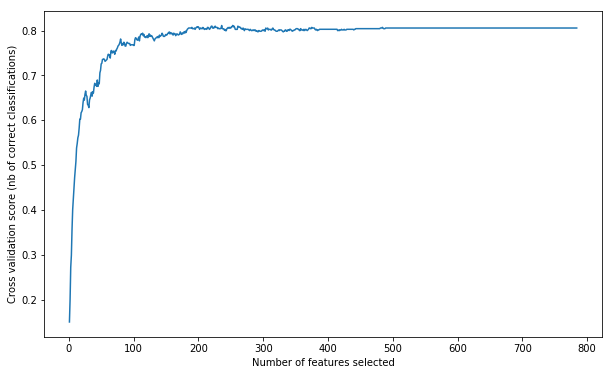

In [17]:
# Plot number of features VS. cross-validation scores
pl.figure(figsize=(10,6))
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation score (nb of correct classifications)")
pl.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
pl.show()

### Adecuate Datasets to Optimal number of features to be used

In [8]:
# Full dataset: create X (features) and y (response)
Selected_features=[97, 103, 125, 127, 128, 129, 130, 131, 133, 147, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 175, 176, 177, 178, 181, 182, 184, 186, 187, 190, 191, 202, 203, 204, 205, 206, 208, 209, 210, 211, 212, 215, 218, 219, 230, 232, 234, 235, 236, 238, 239, 240, 241, 242, 243, 244, 245, 248, 259, 263, 264, 265, 266, 267, 268, 270, 271, 272, 274, 275, 289, 290, 291, 292, 294, 296, 297, 298, 300, 301, 304, 312, 313, 315, 316, 317, 319, 320, 321, 322, 323, 324, 325, 326, 328, 333, 341, 342, 343, 345, 346, 347, 348, 349, 350, 351, 354, 355, 356, 357, 358, 359, 369, 371, 372, 373, 374, 376, 377, 378, 379, 380, 381, 385, 386, 387, 398, 399, 402, 403, 404, 405, 407, 409, 410, 411, 412, 413, 415, 416, 425, 426, 427, 429, 431, 432, 433, 434, 435, 437, 443, 456, 457, 458, 459, 461, 462, 464, 465, 466, 469, 470, 471, 481, 484, 485, 488, 490, 491, 495, 496, 497, 498, 509, 510, 511, 514, 516, 517, 518, 520, 521, 522, 523, 526, 528, 536, 538, 540, 542, 543, 544, 545, 546, 547, 550, 551, 554, 555, 564, 566, 567, 570, 572, 573, 574, 577, 579, 595, 596, 599, 600, 602, 603, 604, 605, 606, 610, 623, 625, 626, 627, 630, 631, 633, 634, 636, 637, 638, 652, 653, 654, 657, 658, 659, 661, 662, 679, 682, 686, 688, 691, 707, 709, 710, 711, 712, 713, 715, 742, 743]
X = pd.DataFrame(X_data)[Selected_features]
y = y_data

In [27]:
## Train and Validation: create datasets
XX_train, XX_test, yy_train, yy_test = train_test_split(X, y, test_size=0.98, random_state=0,
                                                                     stratify= y, shuffle=True)
XX_train.shape, XX_test.shape, yy_train.shape, yy_test.shape


((700, 253), (69300, 253), (700,), (69300,))

### What values for the model's hyperparameters would be selected?

In [28]:
# Import necessary modules
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

startTime = datetime.now()
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'C': np.arange(0.5, 3, 0.5),      
           "solver" : ['newton-cg', 'lbfgs']}

# Instantiate Logistic Regression classifier:
#rf = RandomForestClassifier(n_jobs=-1, max_features='auto', oob_score = True, random_state=0) 
lr = LogisticRegression( n_jobs=-1, random_state=7) 

# Instantiate the RandomizedSearchCV object:
kfold = StratifiedKFold(n_splits=3, random_state=0)
lr_cv = RandomizedSearchCV(lr, param_dist, scoring = 'accuracy', n_jobs=-1, cv=kfold)

# Fit it to the data
lr_cv.fit(XX_train, yy_train)
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')

Total running time (H: M: S. ThS) 0:00:49.025804 seconds.


In [11]:
# Print the tuned parameters and score
print("Tuned LR Parameters: {}".format(lr_cv.best_params_))
print("Best score is {}".format(lr_cv.best_score_))

Tuned LR Parameters: {'solver': 'lbfgs', 'C': 0.5}
Best score is 0.84


## Using the best parameters to Fit, Evaluate, and Make predictions

## Fitting the Model

In [29]:
# train your model using X_train, y_train and the best known parameters
lr = LogisticRegression( C=0.5, solver='lbfgs', n_jobs=-1, random_state=7)
lr.fit(XX_train, yy_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=7, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

### Evaluating the Model

#### <font color=orange><i>Getting Accuracy and Confusion Matrix</i></font>

In [30]:
# Evaluating LR model
print('With LR train datasets () accuracy is: ',round(lr.score(XX_train,yy_train),4)) # accuracy 

With LR train datasets () accuracy is:  1.0


In [32]:
predictions = lr.predict(XX_test)
print('Accuracy based on XX_test, yy_test: ',accuracy_score(yy_test, predictions))
print('')
print('Confusion Matrix:\n ',confusion_matrix(yy_test, predictions))
print('With LR train datasets () accuracy is: ',round(lr.score(XX_train,yy_train),4)) # accuracy ',confusion_matrix(y_test, predictions))
print(classification_report(yy_test, predictions))

Accuracy based on XX_test, yy_test:  0.8111399711399712

Confusion Matrix:
  [[6210    6   53   12   37  187  126   10  170   23]
 [   2 7536   33   43    8   36   19   20   91   10]
 [  96  240 5297  153  373   23  275  195  177   91]
 [  56  107  275 5448   64  298   90  202  225  305]
 [  17   33  162   19 5569   37   92   60  198  569]
 [  90  121   76  657  228 3973  257   41  644  163]
 [  42  103  112   21  101  114 6060    2  243    9]
 [  77   94   52   36  191   50   43 6408   49  220]
 [  54  486  200  291   76  439   96   96 4656  363]
 [ 109   23  120   91  355  134   16  759  226 5055]]
With LR train datasets () accuracy is:  1.0
             precision    recall  f1-score   support

          0       0.92      0.91      0.91      6834
          1       0.86      0.97      0.91      7798
          2       0.83      0.77      0.80      6920
          3       0.80      0.77      0.79      7070
          4       0.80      0.82      0.81      6756
          5       0.75      0

Precision, recall and f1-score are metrics to measure the accuracy of classification models. A general explanation can be got in [Wikipedia](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers).

Based on LR testing datasets (XX_test, yy_test), looks like we misclassified 13088 digit's images, leaving us with a 81.11% accuracy rate  (with 81% precision and 81% recall). Meantime, With LR train datasets (XX_train, yy_train) accuracy is  100%

#### <font color=orange><i>Examining the Model's Mistakes</i></font>

Let us determine the examples in the validation set where the model predictions were wrong. These correspond to the elements of <font color=red>y_test</font> that are not equal to the same entry in <font color=red>predictions</font>. The numpy where function returns a list of indices that satisfy a condition, so the indices corresponding to the errors are:

In [33]:
error_idx = np.where(yy_test != predictions)[0]
error_idx
#pd.Series(error_idx.tolist())

array([    9,    20,    27, ..., 69289, 69294, 69298], dtype=int64)

In [34]:
len(error_idx)

13088

We'll choose 20 indices at random from our error_idx array and plot the image, together with the prediction and the correct label:

In [35]:
rand_idx = np.random.choice(error_idx, size=20, replace=False)
rand_idx

array([15202, 41673, 40531, 30580, 26121, 56708,  5525,  2686, 50124,
       16773, 22259, 56287, 41023, 48748, 29737, 17084, 68464, 62416,
       21408, 40202], dtype=int64)

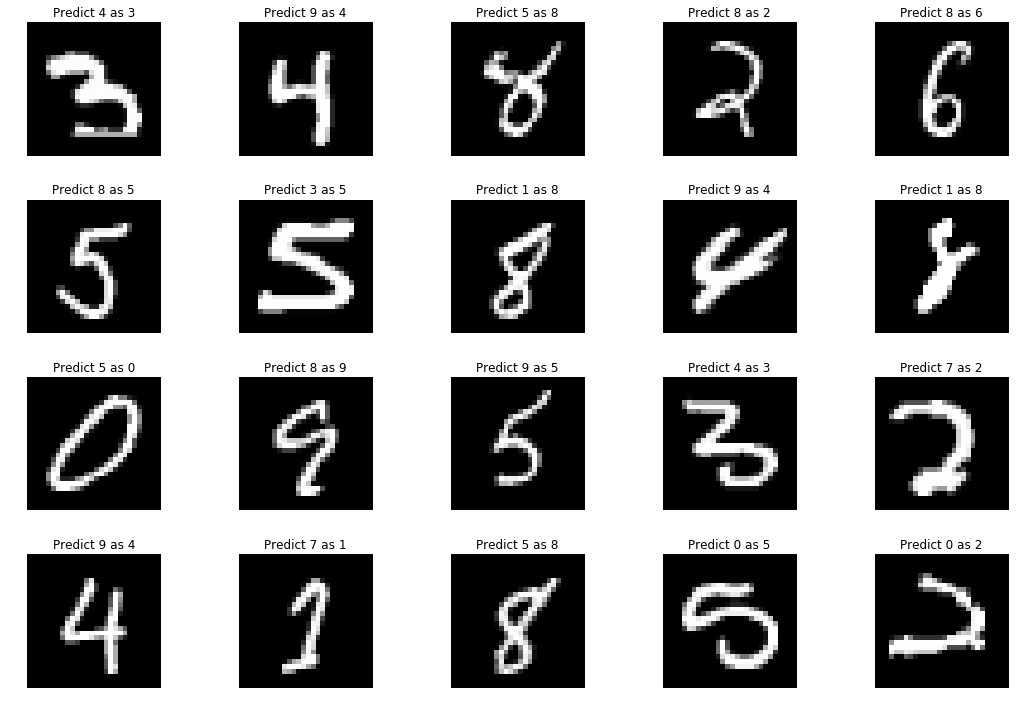

In [36]:
fig, axs = pl.subplots(nrows=4, ncols=5, figsize=(15,10))

i = 0
for ax in axs.reshape(-1):
    ax.set_title("Predict %d as %d" % (predictions[rand_idx[i]], y_test[rand_idx[i]]))
    ax.imshow(X_test[rand_idx[i]].reshape(28,28), cmap=pl.cm.gray, origin='upper', interpolation='nearest')
    ax.axis('off')
    i += 1
pl.tight_layout()    
pl.show()

In the exploratory stage of these data () it is concluded that we should expect that the model does not present an extremely high accuracy because the digits have different strokes and, in some cases, turn out to be very strange.
  
From the previous visualization, we can see that the errors of classification of the images are based on that, in general, we can find some cases in which the writing is deficient or the digit has a strange orientation.

This situation, which usually is not a real problem for a human being, constitutes a base of error not easy to overcome by a computational algorithm.

### Making Predictions

#### Based on the training dataset

The function cross_val_predict has a similar interface to cross_val_score, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set obtained from the partition over X_train (in our case).

In [37]:
predictions = cross_val_predict(lr, XX_train, yy_train, cv=3)
print('Prediction: {}', predictions)

Prediction: {} [5 0 4 1 6 3 3 9 8 0 3 0 6 7 4 8 5 7 5 9 0 0 3 8 5 0 4 0 3 7 9 0 8 2 1 0 2
 3 6 3 8 1 7 4 0 8 2 0 8 7 2 8 6 8 9 7 5 1 1 3 1 6 5 5 6 0 7 6 7 0 5 9 1 4
 5 1 7 1 9 7 7 4 5 2 5 5 3 5 8 7 0 3 4 9 1 8 3 8 4 2 9 6 5 7 9 9 2 7 7 1 6
 8 4 5 7 8 4 6 4 5 8 6 6 1 2 7 5 3 5 2 9 1 1 4 4 9 3 0 4 9 4 0 2 1 8 6 8 8
 5 6 5 1 9 9 9 2 1 9 8 0 7 6 2 6 1 5 1 6 0 2 3 1 0 5 6 5 7 1 7 2 7 5 2 3 7
 4 6 9 7 1 9 5 0 8 5 8 7 9 1 8 3 5 7 7 5 3 3 2 0 9 5 1 8 6 2 7 8 3 1 8 3 9
 0 0 1 7 0 2 3 9 2 8 0 6 3 8 6 7 0 4 8 1 6 6 3 0 8 3 8 7 7 6 0 2 6 3 1 4 9
 9 6 9 7 4 3 1 2 8 4 6 1 5 3 2 5 3 4 3 3 7 1 8 8 7 4 4 3 9 1 8 0 1 1 8 7 9
 3 7 1 7 6 2 0 6 0 9 3 2 5 6 1 3 2 2 2 7 7 2 7 9 1 2 9 6 0 4 3 7 1 9 4 9 0
 0 9 6 4 8 0 0 2 7 1 5 0 9 9 7 9 1 2 9 8 5 7 4 4 1 5 8 8 0 8 7 0 9 9 2 4 3
 9 3 6 3 2 8 6 0 7 8 1 8 7 2 8 6 1 6 7 2 2 1 9 4 1 1 4 2 1 3 5 0 9 4 0 7 9
 1 2 6 3 8 7 1 7 3 2 3 5 1 9 5 2 6 1 8 2 1 9 5 4 1 4 0 1 5 1 6 1 1 4 8 0 1
 9 0 2 7 0 8 7 9 8 1 4 9 7 8 3 8 1 6 3 0 4 9 0 1 9 7 0 3 2 7 5 5 3 8 5 9 8
 0 2 4 9 6

#### Based on the test dataset

Now we used the function predict which is regularly the one to be used to get the predictions on a new dataset.  In our case, the new dataset is the X_test one.

In [38]:
# train your model using all data.
startTime = datetime.now()
lr.fit(X, y) 
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')

Total running time (H: M: S. ThS) 0:03:39.070530 seconds.


In [39]:
predictions = lr.predict(XX_test)
print('Prediction: {}', predictions)

Prediction: {} [4 3 4 ... 1 8 1]


<hr>
By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; July 25, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>